In [1]:
%matplotlib inline

In [2]:
import requests
import pandas as pd

from dateutil import parser
from jupyterthemes import jtplot

In [3]:
jtplot.style(theme='onedork')

In [4]:
url = "https://api.blockchain.info/charts/market-price?timespan=all"
data = requests.get(url).json()
df = pd.DataFrame(data["values"])

In [5]:
url_current_price = 'https://api.coindesk.com/v1/bpi/currentprice.json'
data_cp = requests.get(url_current_price).json()
cp = float(data_cp['bpi']['USD']['rate'].replace(',',''))
ct = parser.parse(data_cp['time']['updated'])

df = df.append({'x':ct.timestamp(), 'y':cp}, ignore_index=True)

In [6]:
df.columns = ['Date','USD/BTC']
df["Date"] = pd.to_datetime(df["Date"], unit='s')
df=df.set_index("Date")

df['Max'] = df['USD/BTC'].max()
imax = df['USD/BTC'].idxmax()
df['local_Min'] = df['USD/BTC'][imax:].min()

Date
2020-03-21 00:00:00    6226.4400
2020-03-24 00:00:00    6502.1600
2020-03-27 00:00:00    6763.7500
2020-03-30 00:00:00    5885.4100
2020-03-31 04:38:00    6423.0833
Name: USD/BTC, dtype: float64

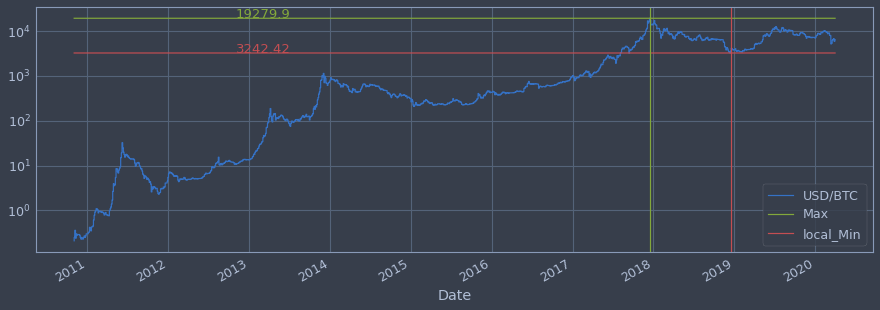

In [7]:
ax = df["2010-11":].plot(logy=True, drawstyle="steps", figsize=(15, 5))

ax.annotate(df['USD/BTC'][imax], xy=("2012-11",df["USD/BTC"][imax]), color='g')
ax.axvline(imax, color='g')

lmi = df['USD/BTC'][imax:].idxmin()
ax.annotate(df['USD/BTC'][lmi], xy=("2012-11",df["USD/BTC"][lmi]), color='r')
ax.axvline(lmi, color='r')

df['USD/BTC'].tail()

Timestamp('2017-08-10 00:00:00')

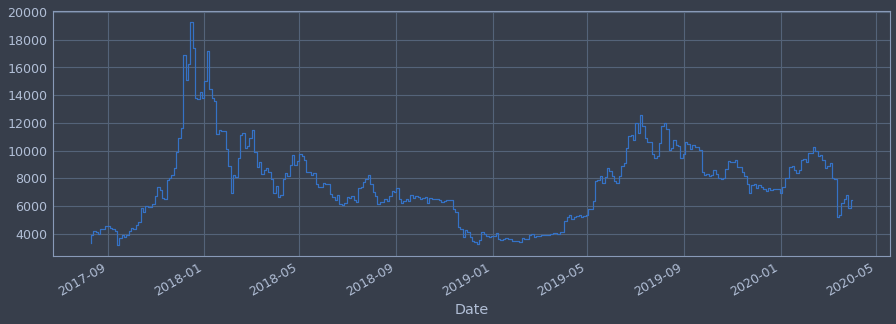

In [12]:
start = df['USD/BTC'][df['USD/BTC']>df['local_Min']].index[0]
df[start:]["USD/BTC"].plot(drawstyle="steps", figsize=(15, 5))
start